# Data Exploration and Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
data = pd.read_csv("diabetic_data.csv")
data_minus_ids =  data.drop(['encounter_id', 'patient_nbr', "admission_type_id",	"discharge_disposition_id",	"admission_source_id"], axis=1)
data_minus_ids.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#Check to make sure Each encounter is Unique
is_unique = len(np.unique(data["encounter_id"])) == len(data["encounter_id"])
print(f"Encounter is unique: {is_unique}")

#Check if all patients are unique
is_unique = len(np.unique(data["patient_nbr"])) == len(data["patient_nbr"])
print(f"Patient_nbr is unique: {is_unique}. Len unique {len(np.unique(data["patient_nbr"]))}. Len of non unique {len(data["patient_nbr"])}")

Encounter is unique: True
Patient_nbr is unique: False. Len unique 71518. Len of non unique 101766


In [7]:
#Check the ammount of times each patient had went to the hospital
value_counts = data["patient_nbr"].value_counts()
print(value_counts)

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64


In [8]:
# Check if patient Number 88785891 was ever not admitted
data[(data['readmitted'] == ">30") & (data["patient_nbr"] == 43140906)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
41560,128462484,43140906,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
44802,138303666,43140906,Caucasian,Female,[10-20),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
54281,158221548,43140906,Caucasian,Female,[10-20),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,>30
72990,214785504,43140906,Caucasian,Female,[20-30),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
78415,239448402,43140906,Caucasian,Female,[20-30),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [9]:
#Made new readmitted columns
data['Was Readmitted'] = data['readmitted'].apply(lambda x: "YES" if x == ">30" or x == "<30" else x)
data['Was Readmitted'] 

0          NO
1         YES
2          NO
3          NO
4          NO
         ... 
101761    YES
101762     NO
101763     NO
101764     NO
101765     NO
Name: Was Readmitted, Length: 101766, dtype: object

In [10]:
# Change age from range to one value

def get_fixed_age(input_str):
    numbers = re.findall(r'\d+', input_str)
    #Extract numbers using regex and Convert them to integers
    num1, num2 = map(int, re.findall(r'\d+', input_str))
    result = int((num2 - num1) / 2) + num1
    return result

data['fixed_age'] = data['age'].apply(get_fixed_age)

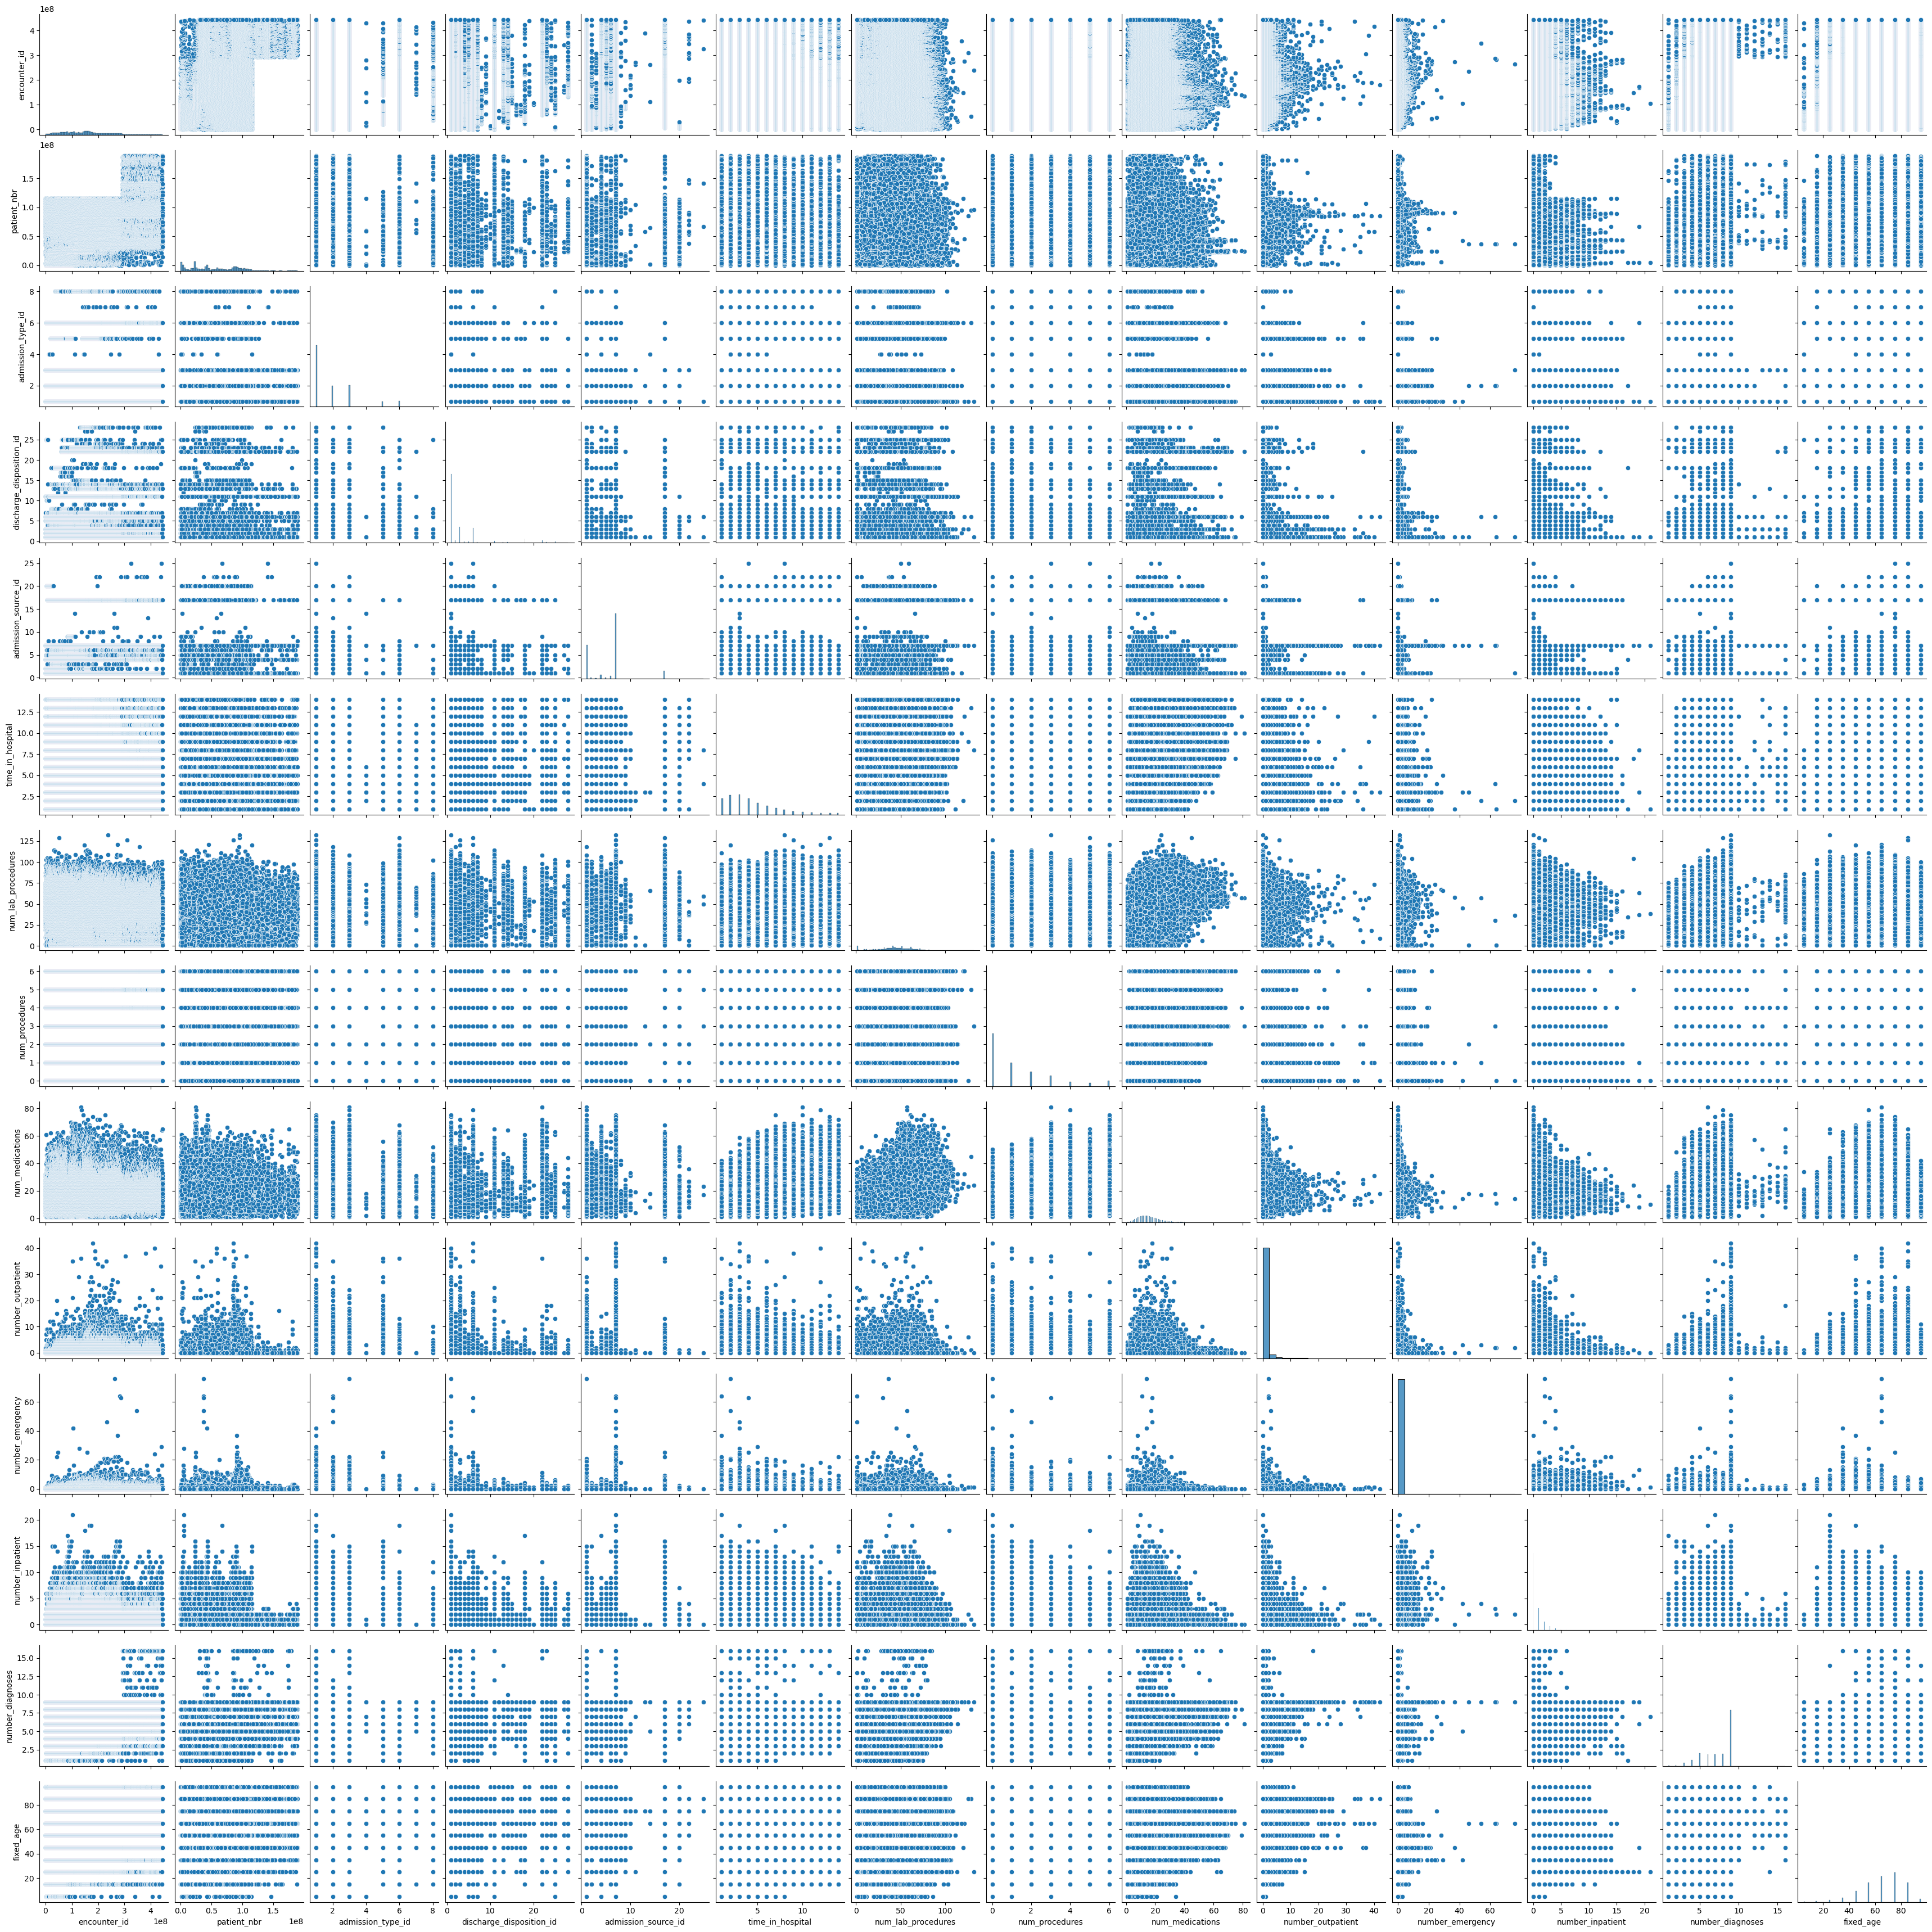

In [11]:
import seaborn as sb

sb.pairplot(data)
plt.show()

<Axes: title={'center': 'Insulin dosage change for Non readmission encounters'}, ylabel='count'>

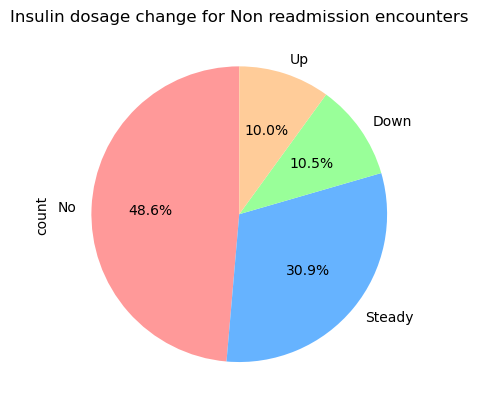

In [12]:
insulin_admitted  = data[data["Was Readmitted"] == "NO"]["insulin"]
value_counts = insulin_admitted.value_counts()
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], title="Insulin dosage change for Non readmission encounters")

<Axes: title={'center': 'Insulin dosage change for readmission encounters'}, ylabel='count'>

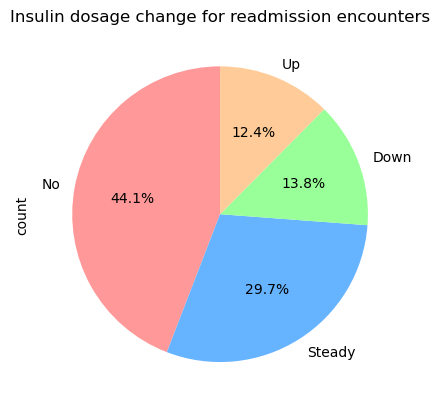

In [13]:
insulin_admitted  = data[data["Was Readmitted"] == "YES"]["insulin"]
value_counts = insulin_admitted.value_counts()
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], title="Insulin dosage change for readmission encounters")

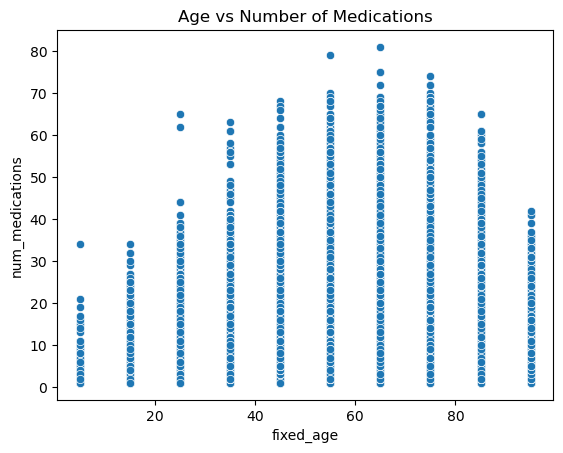

In [ ]:
sb.scatterplot(x='fixed_age', y='num_medications', data=data).set(title="Age vs Number of Medications")
plt.show()

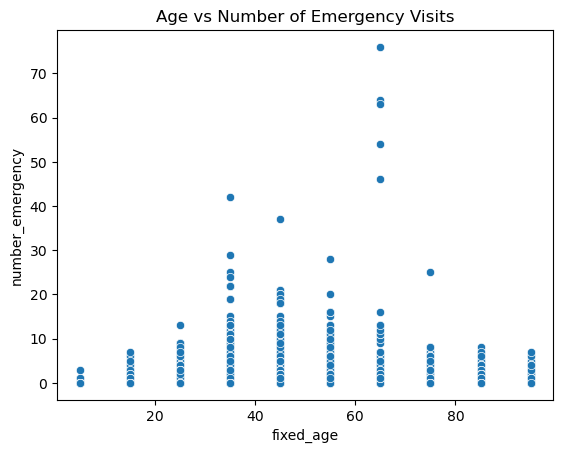

In [29]:
sb.scatterplot(x='fixed_age', y='number_emergency', data=data).set(title="Age vs Number of Emergency Visits")
plt.show()

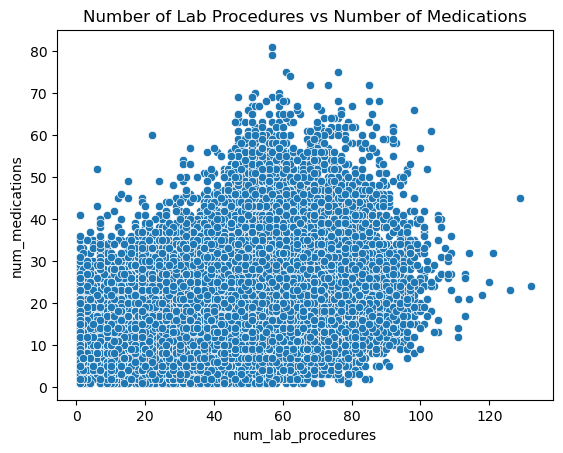

In [30]:
sb.scatterplot(x='num_lab_procedures', y='num_medications', data=data).set(title="Number of Lab Procedures vs Number of Medications")
plt.show()

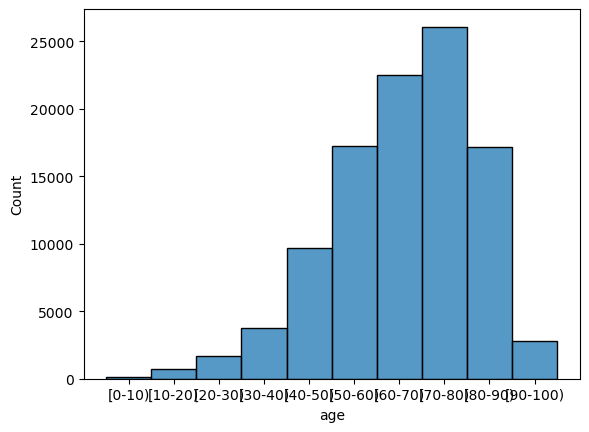

In [36]:
sb.histplot(data['age'])
plt.show()

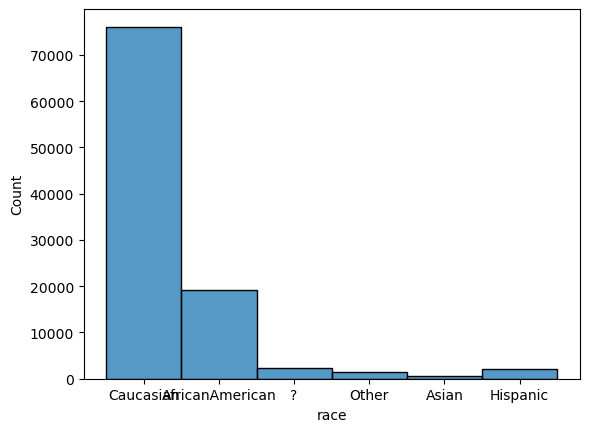

In [37]:
sb.histplot(data['race'])
plt.show()